In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#step 1 : data preparation
df = pd.read_csv('C:/Users/hp/Desktop/mnist_train.csv')

In [11]:
print(df.shape)
data = df.values #converting data frame to numpy array


(60000, 785)


In [23]:
X = data[ : , 1:]
Y = data[ : , 0]
print(X.shape , Y.shape)

(60000, 784) (60000,)


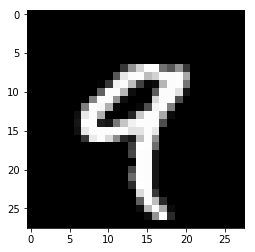

In [26]:
#visulaize some samples
def drawImg(sample):
    img = sample.reshape(28,28)
    plt.imshow(img , cmap='gray')
    plt.show()
    
drawImg(X[4])

In [19]:
split = int(0.8*X.shape[0])
X_train = X[ :split , :]
Y_train = Y[ :split ]

X_test = X[split: , :]
Y_test = Y[split:]

print(X_train.shape , Y_train.shape)
print(X_test.shape , Y_test.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [27]:
#step 2 : KNN

def dist(x1 , x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X, Y , queryPoint , k=5):
    vals =[]
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint , X[i])
        vals.append((d , Y[i]))
        
    vals= sorted(vals)
    #considering nearest k points
    vals = vals[ :k]
    
    vals = np.array(vals)
    
    new_vals = np.unique(vals[ : ,1 ] , return_counts = True)
    
    index  = new_vals[1].argmax()
    ans = new_vals[0][index]
    
    return ans



In [32]:
#step 3 : make predictions
pred = knn(X_train , Y_train , X_test[3])
print(int(pred))

8


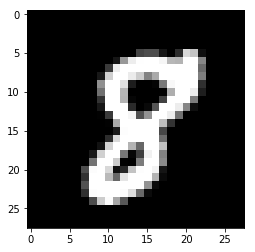

8


In [33]:
drawImg(X_test[3])
print(Y_test[3])

In [ ]:
#step 4: compute accuracy of knn
a = X_test.shape[0]

vals = []
for i in range(a):
    pred = knn(X_train , Y_train , X_test[i])
    vals.append(pred)

In [ ]:
count = 0
for i in range(a):
    if(vals[i]==Y_test[i]):
        count++
        
accuracy = (count/a)*100
print(accuracy)